In [ ]:
# Install Kaggle API
!pip install kaggle
!pip install pandas numpy tensorflow scikit-learn

# Make a directory for Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the API token
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Download Jigsaw dataset
!kaggle competitions download -c jigsaw-multilingual-toxic-comment-classification

# Unzip the dataset files
!unzip jigsaw-multilingual-toxic-comment-classification.zip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
unzip:  cannot find or open jigsaw-multilingual-toxic-comment-classification.zip, jigsaw-multilingual-toxic-comment-classification.zip.zip or jigsaw-multilingual-toxic-comment-classification.zip.ZIP.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout


In [ ]:
# Load the dataset
data = pd.read_csv('/content/train.csv')

In [ ]:
# Preview the data
data.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:


# Check for missing values
data.isnull().sum()

# We are focusing on 'comment_text' and 'toxic' columns
data = data[['comment_text', 'toxic']]

In [ ]:
# Binarize the toxicity labels (1 = toxic, 0 = non-toxic)
data['toxic'] = data['toxic'].apply(lambda x: 1 if x > 0 else 0)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['comment_text'], data['toxic'], test_size=0.2, random_state=42)

# Tokenize and pad sequences
MAX_NUM_WORDS = 20000  # Limit vocab size
MAX_SEQUENCE_LENGTH = 100  # Max length of each comment

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)


In [ ]:
data = Sequential()
data.add(Embedding(MAX_NUM_WORDS, 128, input_length=MAX_SEQUENCE_LENGTH))
data.add(Bidirectional(LSTM(64, return_sequences=True)))
data.add(Dropout(0.5))
data.add(LSTM(64))
data.add(Dense(32, activation='relu'))
data.add(Dropout(0.5))
data.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
data.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
data.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = data.fit(X_train_pad, y_train, epochs=3, batch_size=128, validation_data=(X_test_pad, y_test))


Epoch 1/3
998/998 ━━━━━━━━━━━━━━━━━━━━ 681s 675ms/step - accuracy: 0.9356 - loss: 0.2084 - val_accuracy: 0.9631 - val_loss: 0.1068
Epoch 2/3
998/998 ━━━━━━━━━━━━━━━━━━━━ 710s 703ms/step - accuracy: 0.9672 - loss: 0.0958 - val_accuracy: 0.9635 - val_loss: 0.1085
Epoch 3/3
998/998 ━━━━━━━━━━━━━━━━━━━━ 732s 694ms/step - accuracy: 0.9734 - loss: 0.0761 - val_accuracy: 0.9609 - val_loss: 0.1189


In [ ]:
# Predict on the test set
y_pred = (data.predict(X_test_pad) > 0.5).astype('int32')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


998/998 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step
Accuracy: 96.09%


In [ ]:
# Save the model
data.save('toxicity_classification_model.h5')


In [ ]:
# Load the saved model
from tensorflow.keras.models import load_model
loaded_model = load_model('toxicity_classification_model.h5')

# Make predictions with the loaded model
y_pred_loaded = (loaded_model.predict(X_test_pad) > 0.5).astype('int32')

# Accuracy of the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f'Accuracy of loaded model: {accuracy_loaded * 100:.2f}%')


998/998 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step
Accuracy of loaded model: 96.09%


In [ ]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('toxicity_classification_model.h5')

# Load the tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

MAX_SEQUENCE_LENGTH = 100  # Set this to your maximum sequence length used during training

# Function to predict toxicity of a new comment
def predict_toxicity(comment):
    # Tokenize and pad the input comment
    sequence = tokenizer.texts_to_sequences([comment])
    padded_sequence = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)

    # Make a prediction
    prediction = loaded_model.predict(padded_sequence)

    # Determine if the comment is toxic (1) or not (0)
    is_toxic = prediction[0][0] > 0.5  # Assuming binary classification
    return "Toxic" if is_toxic else "Non-Toxic"

# Main loop to get user input
while True:
    # Get input from the user
    new_comment = input("Enter a comment (or type 'exit' to quit): ")

    # Exit the loop if the user types 'exit'
    if new_comment.lower() == 'exit':
        break

    # Predict and print the result
    result = predict_toxicity(new_comment)
    print(f"The comment is: {result}")



Enter a comment (or type 'exit' to quit): "You're so dumb, you can't even do basic math!"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
The comment is: Toxic
Enter a comment (or type 'exit' to quit): "Shut up, you're so annoying and useless!"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The comment is: Toxic
Enter a comment (or type 'exit' to quit): "You're the reason people lose hope in humanity."
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The comment is: Toxic
Enter a comment (or type 'exit' to quit): "Great job on completing the project, keep it up!"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
The comment is: Non-Toxic
Enter a comment (or type 'exit' to quit): "You're nothing but a joke, go cry somewhere else."
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
The comment is: Toxic
Enter a comment (or type 'exit' to quit): "Get out of here, nobody wants you around."
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The comment is: Non-Toxic
Enter a comment (or type 'exit' to quit): "You’re a complete waste of space."
1/1 ━━━━━━━━━

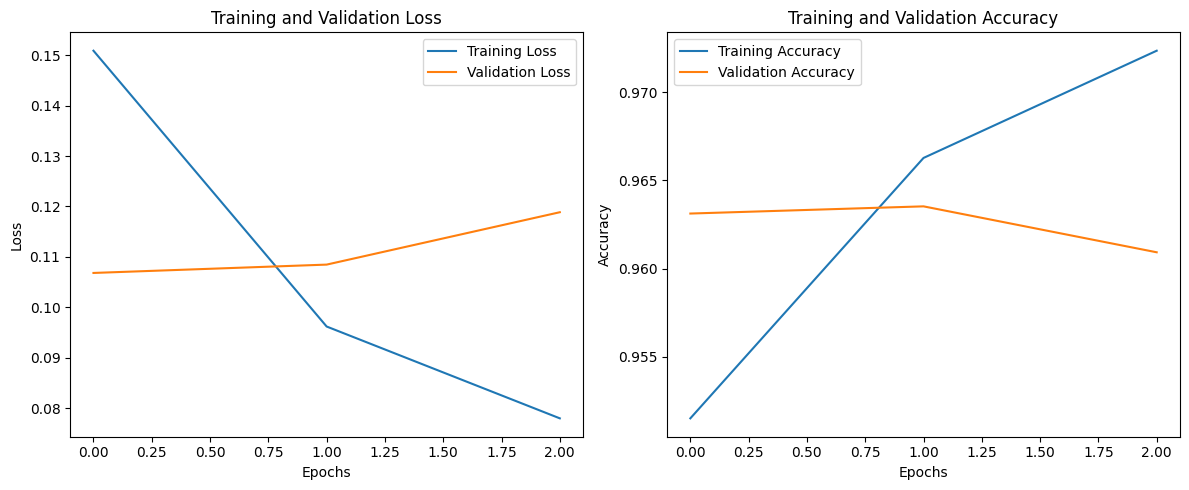

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history
history_dict = history.history

# Extract the loss and accuracy for training and validation
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Plotting the loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
